# Homework 1

## Concept: Neural Networks

A neural network in computer science is a system made to be analogous to that of a biological neural network, in that it has multiple interconnected layers of "perceptrons" aka "neurons"   that perform computations moving from the input layer forward through to the output layer. The result of these computations is then weighed against a desired output, and multiplicative  weights are shifted to then decrease the gap between expected vs actual, also known as decreasing the cost, in a process called back-propagation. Back-propagation is a process in which computations are performed started from the output neurons and ending at the input, which adjusts the weights of the network. As such, a neural network is said to have  made a "learning step" as it becomes more accurate and approaches a minimum cost. Approaching the minimum cost can also be defined as the mathematical term "gradient descent".

### Demonstration 

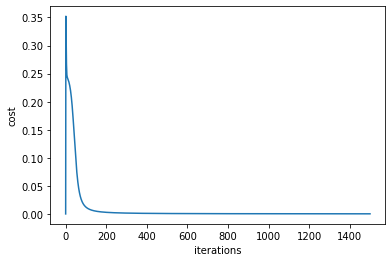

Output of the neural network is: 
[[0.01289965]
 [0.9876326 ]
 [0.98608264]
 [0.01492218]]


In [143]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#define the sigmoid activation function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

#define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

#define the neural network class
class NeuralNetwork:
  #initialize the neural network
  def __init__(self,x,y):
    self.input = x
    self.weights_i = np.random.rand(self.input.shape[1],4)
    self.weights2 = np.random.rand(4,1)
    self.y = y
    self.output = np.zeros(self.y.shape)
    self.cost = [0]
    self.hidden_layers = []
    self.num_layers = 0
   

  #feed forward the neural network
  def feedforward(self):
    self.hidden_layers.append(sigmoid(np.dot(self.input, self.weights_i)))
    self.output = sigmoid(np.dot(self.hidden_layers[self.num_layers], self.weights2))
    self.num_layers += 1
    
    
  #backpropagate the neural network
  def backpropagate(self):
    delta2 = (self.y - self.output) * sigmoid_derivative(np.dot(self.hidden_layers[self.num_layers - 1], self.weights2))
    delta1 = np.dot(delta2, self.weights2.T) * sigmoid_derivative(np.dot(self.input, self.weights_i))
    self.weights2 += np.dot(self.hidden_layers[self.num_layers - 1].T, delta2)
    self.weights_i += np.dot(self.input.T, delta1)
    self.cost.append(np.mean(np.square(self.y - self.output)))

#plot the cost against the number of iterations
def plot_cost(network):
  plt.plot(network.cost)
  plt.xlabel("iterations")
  plt.ylabel("cost")
  plt.show()

#train the neural network
def train_network(network, epochs):
  for i in range(epochs):
    network.feedforward()
    network.backpropagate()
  plot_cost(network)

#generate some dummy data
x = np.array([[0,1,1],
              [1,0,1],
              [1,1,1],
              [0,0,1]])
y = np.array([[0],[1],[1],[0]])

#create the neural network
network = NeuralNetwork(x,y)

#train the neural network
train_network(network, 1500)

#print the output of the neural network
print("Output of the neural network is: \n{}".format(network.output))

## Concept Computer Rendering

Computer rendering is the process of creating a digital representation of an object in a simulated environment. This graphical representation of a scene is referred to as a “render”. Rendering is most often used in the digital creation of images, animation, and 3D models. To create a digital render, algorithms are used to determine the properties of a scene and the position of objects within it. This includes things like surface texture, reflections, shadows, and lighting. Additionally, algorithms are used to calculate the color, intensity and direction of light as it bounces off of the different surfaces in a scene. The algorithms also take into account optical effects such as refraction and transparency. After the scene is rendered with these characteristics taken into account, the resulting image is displayed on a computer screen or projected using a projector.

### Demonstration

see below

combinaton of neural networks and computer rendering. NERF!!

## Concept Neural Radiance Fields

A neural radiance field is a novel computer vision method that takes in discrete and sparse xyz + viewing angle input through a neural network to output a continuous RGB + Density.

### Demonstration

I turned my brother into nerf.
Process:
- Took 20 pictures on iPhone
- Transferred photos to G Drive
- From G Drive to instant ngp data folder
- Ran shell script to convert from .heic to .jpg
- Ran colmap2nerf on images to generate necessary positional data for nerf
- Then, ran nerf

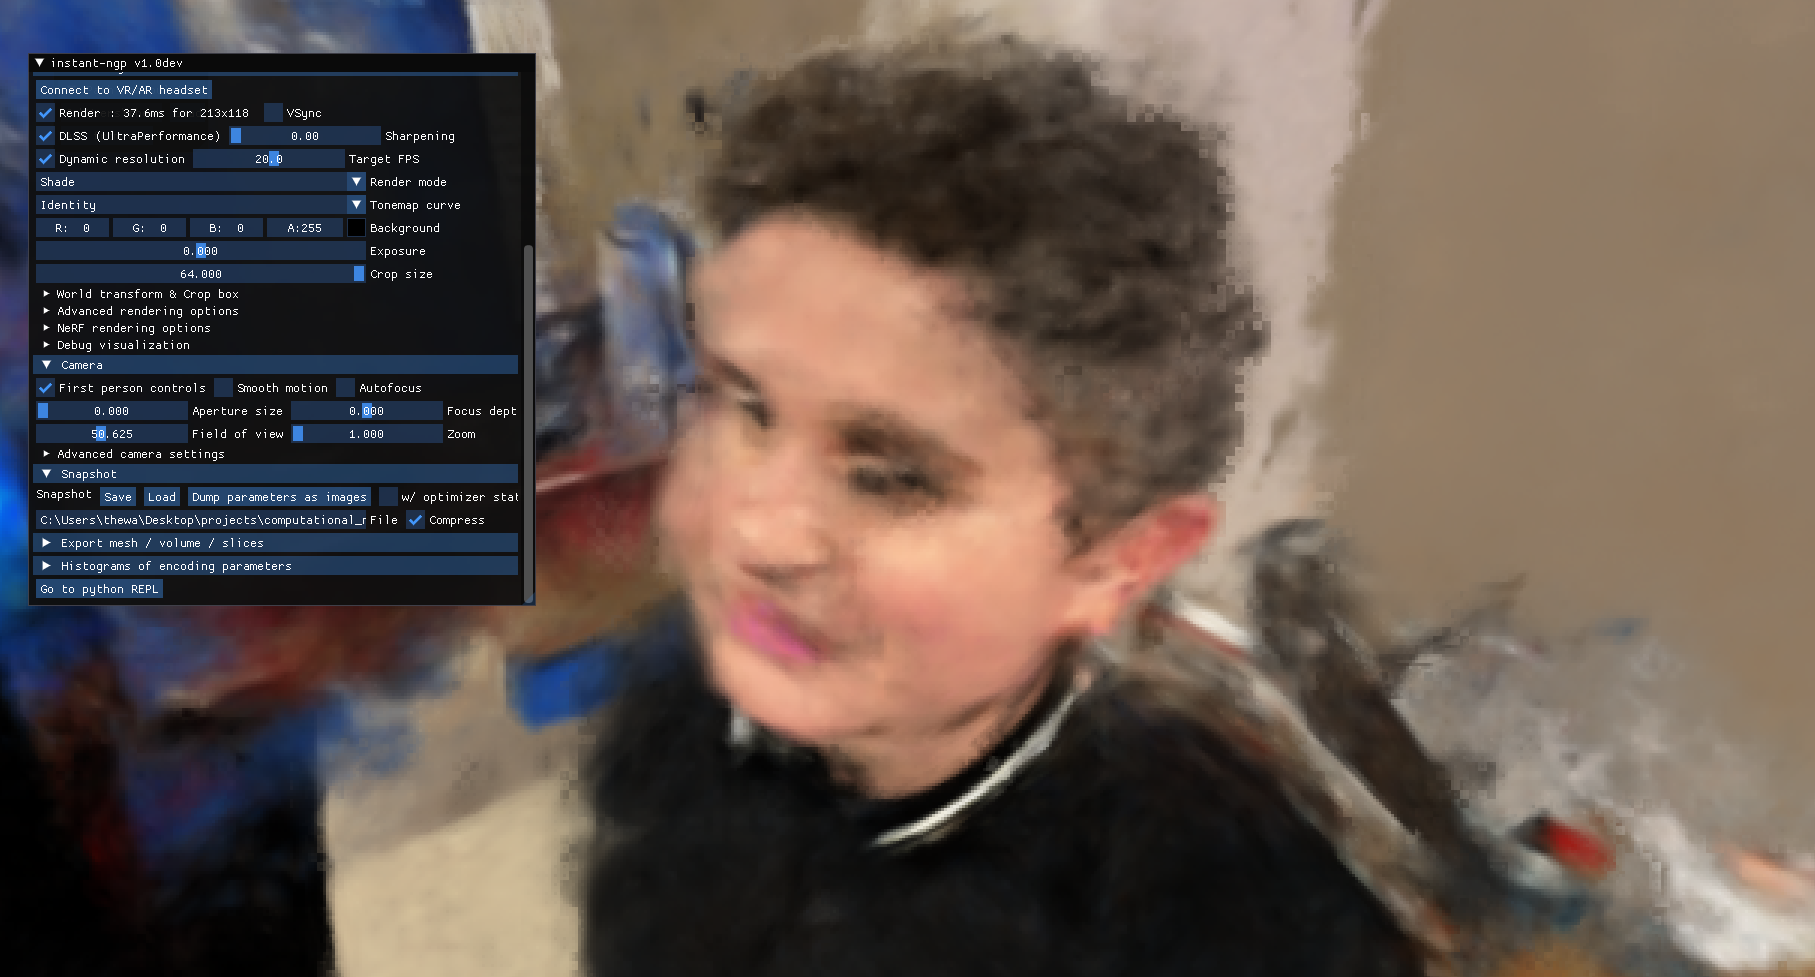
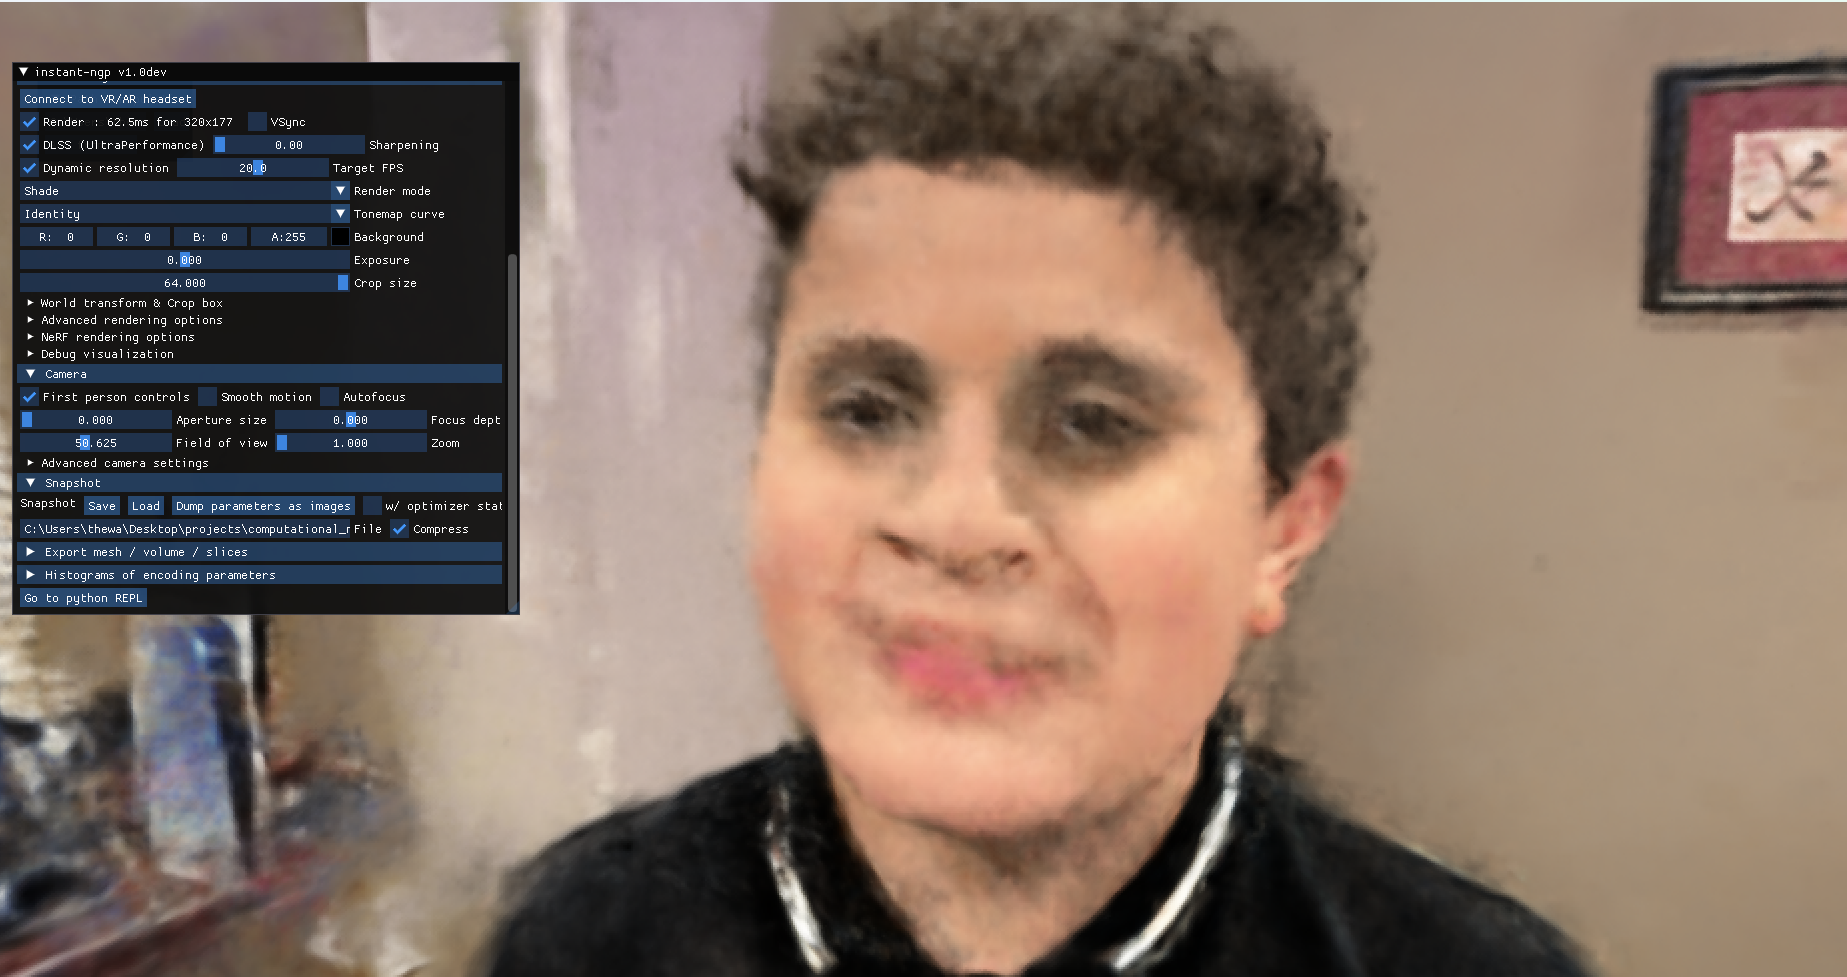